# Machine Problem 2
## Color Transformations

The goal of the machine problem is to apply the concepts of color transformations, specifically using histogram equalization and gamma correction techniques. You are to submit two files for this activity: (1) a Jupyter notebook containing the solutions to the action items. Ensure you provide comments, discussions, and proper section divisions for your code. Please also include your answer to the Guide Questions in the Jupyter Notebook; (2) a PDF version of your Jupyter Notebook. You can provide a link to your submission resources or a zip file. The instructor will run it on their local machine, so make sure the codes and files are accessible and functional. 

In [71]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 1. Information Extraction

### 1a. Reshape Images
Given the image dataset, reshape the images to (100,100,3).

### 1b. Saving resized images
Save the transformed images as JPEG files in a separate directory.

In [73]:
input_directory = '../media/dataset2'
output_directory = 'dataset2_resized'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Reshape images to (100, 100, 3)
for filename in os.listdir(input_directory):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        img_path = os.path.join(input_directory, filename)
        img = cv.imread(img_path)

        # Resize the image to 100x100 pixels
        img_resized = cv.resize(img, (100, 100))

        # Save the resized image as JPEG in a separate directory
        output_filename = os.path.join(output_directory, filename)
        cv.imwrite(output_filename, img_resized)

### 1c. Color Channels Histogram
Create a histogram for the following channels: Reds, Greens, Blues, Hues, Saturations, Intensities

In [74]:
def plot_combined_histograms(img, img_name):
    # Split the channels for RGB
    b_channel, g_channel, r_channel = cv.split(img)

    # Convert the image to HSV for Hue, Saturation, and Intensity
    hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    h_channel, s_channel, v_channel = cv.split(hsv_img)

    # Create a figure with two subplots side by side for each image
    fig, axes = plt.subplots(1, 2, figsize=(12, 3.5))  # 1 row, 2 columns (side by side histograms)

    # Plot combined RGB histograms
    axes[0].hist(r_channel.ravel(), bins=256, color='red', alpha=0.5, label='Red')
    axes[0].hist(g_channel.ravel(), bins=256, color='green', alpha=0.5, label='Green')
    axes[0].hist(b_channel.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    axes[0].set_title(f'RGB Combined Histogram ({img_name})',fontsize=10)
    axes[0].set_xlabel('Pixel Intensity')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    r_channel.ravel()

    # Plot combined HSV histograms
    axes[1].hist(h_channel.ravel(), bins=256, color='purple', alpha=0.5, label='Hue')
    axes[1].hist(s_channel.ravel(), bins=256, color='orange', alpha=0.5, label='Saturation')
    axes[1].hist(v_channel.ravel(), bins=256, color='gray', alpha=0.5, label='Intensity')
    axes[1].set_title(f'HSV Combined Histogram ({img_name})', fontsize=10)
    axes[1].set_xlabel('Pixel Intensity')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

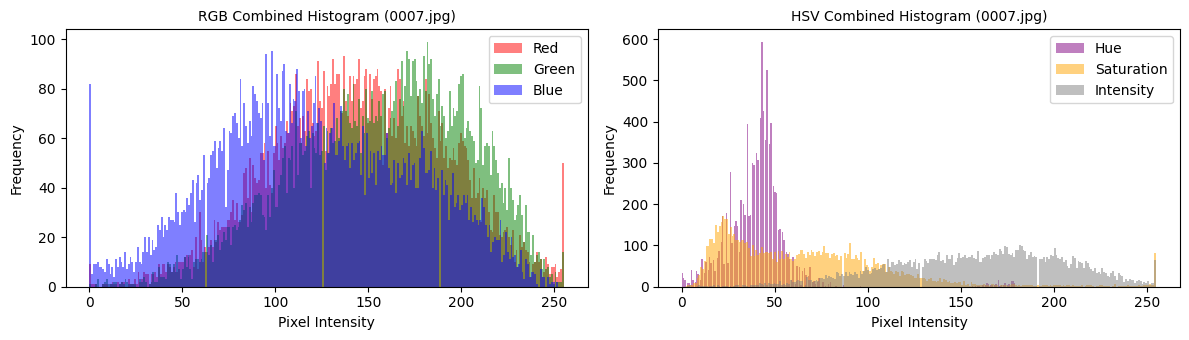

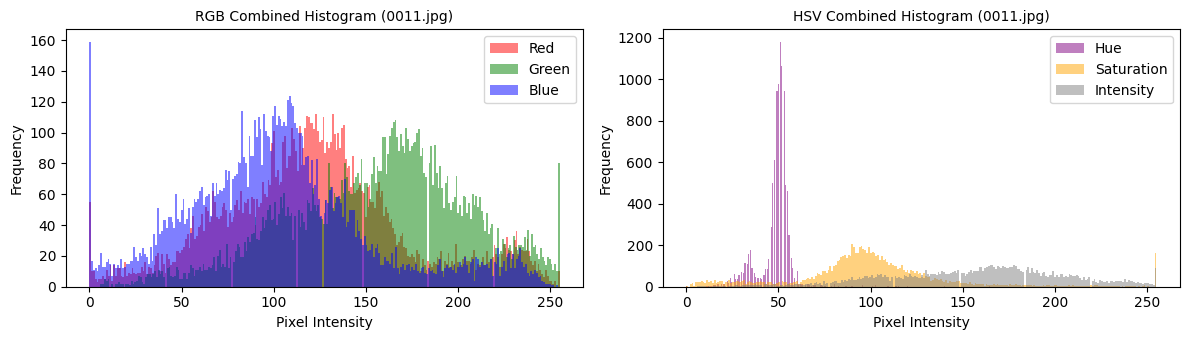

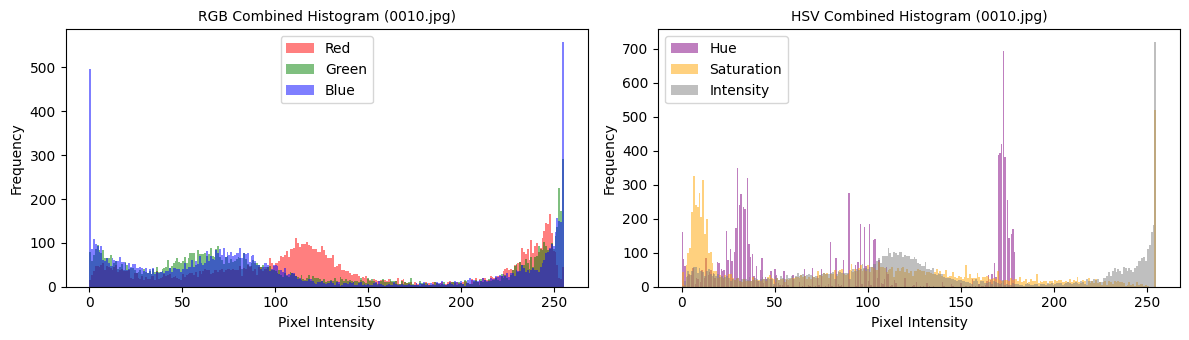

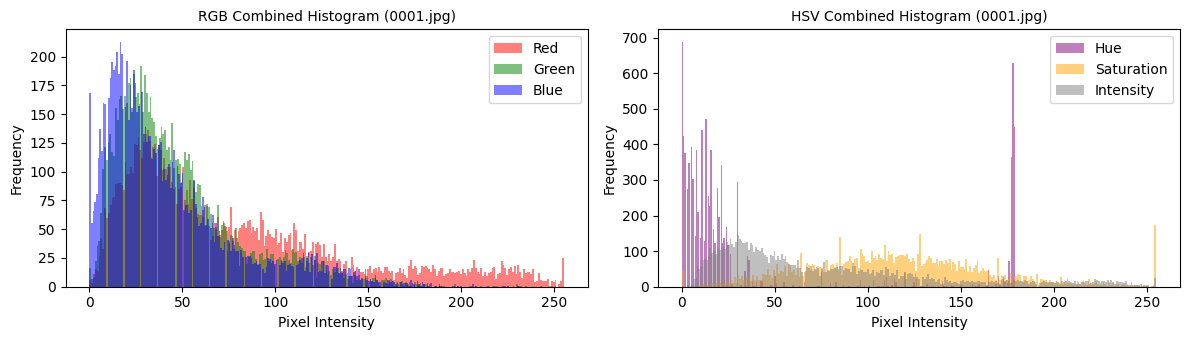

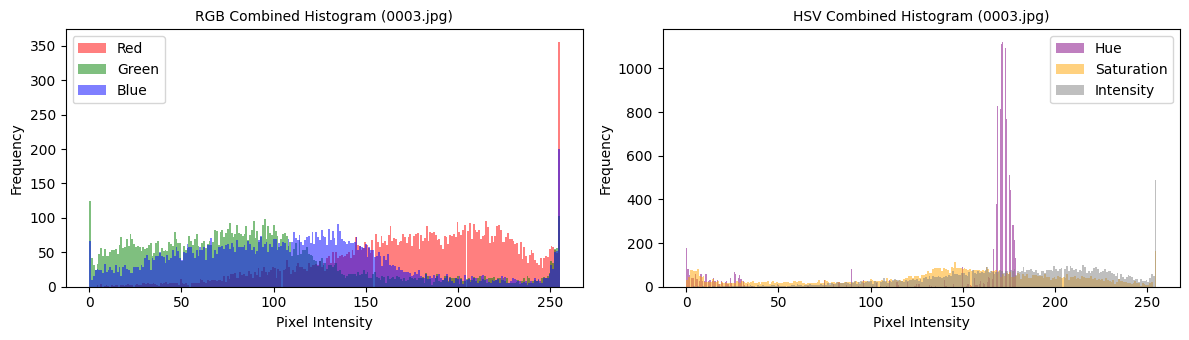

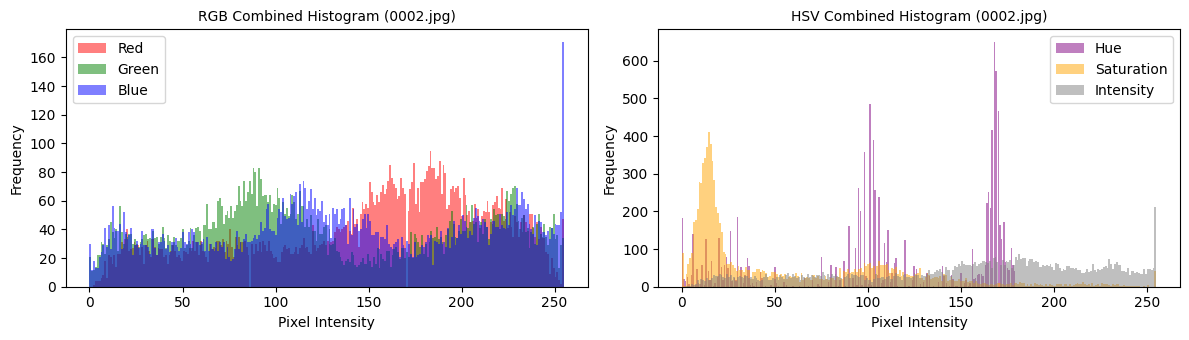

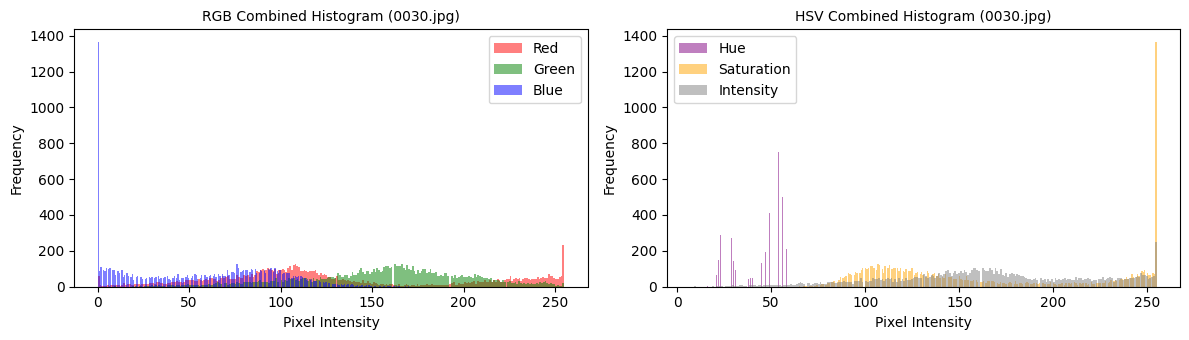

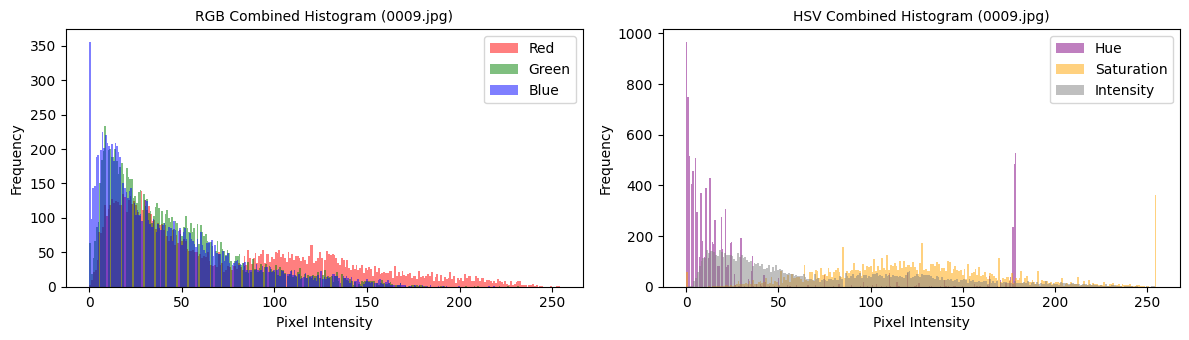

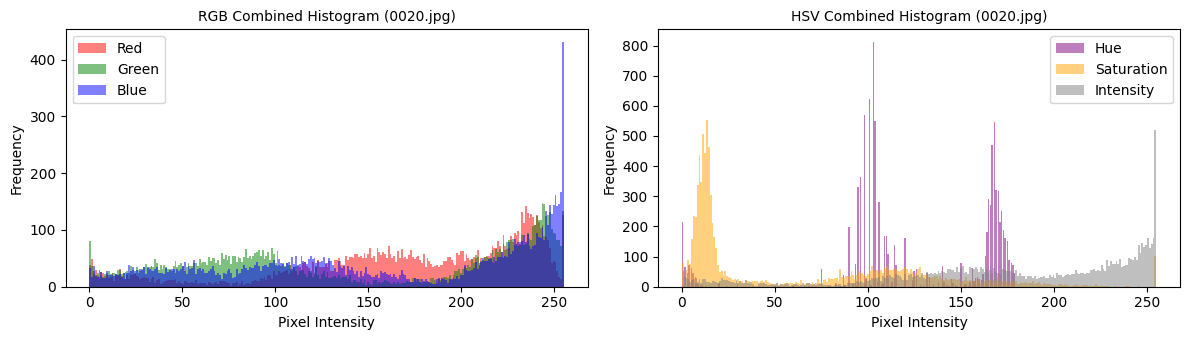

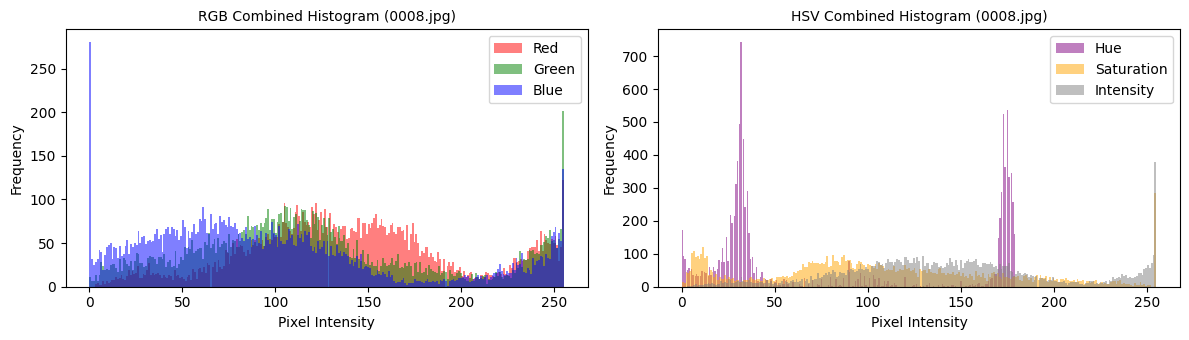

In [75]:
for filename in os.listdir(resized_directory):
    if filename.endswith('.jpg'):  # You can add other extensions if necessary
        img_path = os.path.join(resized_directory, filename)
        img = cv.imread(img_path)

        # Plot combined RGB and HSV histograms side by side for the current image
        plot_combined_histograms(img, filename)

### 1d. Guide Questions

<b> 1. In the RGB space, which channel is most likely to be observed for all images? </b>

Blue is the channel most frequently observed across all the images. In almost all of the RGB histograms, the blue channel has a strong peak near 0 intensity (darker values) and another significant peak near 255 (brighter values), indicating its dominance.

<b> 2. In the HSV space, which top three hues are most likely to be observed for all images? </b>

The top three most observed hues across the images, based on the histograms for hue, appear to be concentrated around:
- 0 to 50 (Reddish tones)
- 100 to 150 (Greenish to yellowish tones)
- 150 to 200 (Bluish tones)


## 2. Data Cleaning

Develop a function that attains the following activities:
- Remove all images that are taken during the night.
- Remove all images that are not pink flowers.



### 2a. Removing images taken during the night

In [70]:
def is_night_image(image, brightness_threshold=40):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray_image)
    
    return mean_brightness < brightness_threshold

### 2b. Removing images of non-pink flowers

In [78]:
# insert code

### 2c. Guide Questions 

<b> 1. What mathematical or statistical bases have you considered when developing your function? </b>

In developing the first function,...


<b>2. What are the challenges in re-orienting the images in this action item?</b>

The challenges in re-orienting the images in this action item is...


<b>3. What can you suggest for automating such a task?</b>

For automating such a task, we would suggest...

## 3. Data Enhancement
From the cleaned dataset, develop and apply a function that:
* Adjusts the exposure of the images based on the brightest image.
  <i>(Hint: You may manually select the representative image and apply Gamma Correction) </i>
* Adjusts the saturation of the images to match the saturation of the most saturated image.
  <i>(Hint: You may manually select the representative image and apply Histogram Equalization and Channel Arithmetic)</i>

### 3a. Adjust exposure

In [77]:
# insert code

### 3b. Adjust saturation

In [77]:
# insert code

## 4. Modified Data Augmentation
Reuse the data augmentation functions from MP2 on geometric transformations and add the following augmentation techniques:
- Increase or decrease the saturation.

### 4a. Adjusting saturation

In [80]:
# insert code